<a href="https://colab.research.google.com/github/RmdanJr/vehicle-distance-estimation/blob/main/tutorials/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection


## Cloning Repo

In [ ]:
!git clone https://github.com/RmdanJr/vehicle-distance-estimation.git

In [ ]:
%cd vehicle-distance-estimation/object-detector/

## Packages & Setup

In [ ]:
!pip install -r requirements.txt

In [ ]:
!python setup.py

Checking setup...
YOLOv5 🚀 2022-6-9 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.8/78.2 GB disk)


## FLIR Dataset

### Download Dataset

In [ ]:
!bash scripts/download-flir-dataset.sh

### Format Dataset as YOLOv5 Format


In [ ]:
!python format-dataset.py

100% 67618/67618 [01:54<00:00, 590.32it/s]
100% 11682/11682 [00:19<00:00, 613.57it/s]


## Fine-tuning YOLOv5s

### YOLOv5 Model & Dataset Configuration

#### Dataset YAML File

In [ ]:
!python create-yaml.py

#### Model's YAML Configuration File


In [ ]:
!python configure-yolo-yaml.py

### Training YOLOv5

In [ ]:
!python train.py --epochs 2 --data dataset.yaml --cfg yolov5s.yaml

## Making Predictions

In [ ]:
!gdown --folder 10jpVGSHGILDt85QGf5KwHji0sUjZXbWR

In [ ]:
!python detect.py --save-txt --weights training-results/weights/best.pt --conf 0.4 --source 'https://youtu.be/CvI5nvUdbsM'

## Generate Objects Coordinates Sheet



The sheet is expected to have a row for each frame & a column for each category. Each cell must have all center coordinates of detected objects of the column (category) on the row (frame).

In [ ]:
!python generate-coordinates-sheet.py

## Examples

In [ ]:
!python display-examples.py

## Results

(-0.5, 2399.5, 1199.5, -0.5)

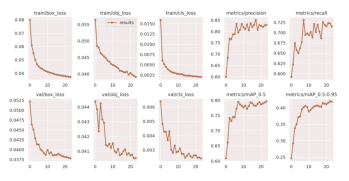

In [ ]:
import cv2
import matplotlib.pyplot as plt

# display results image
# imread() reads image as grayscale, second argument is one => grayscale, zero => RGB 
img = cv2.imread('training-results/results.png', 1)
plt.imshow(img)
plt.axis('off')